In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\admin\Desktop\train.csv')
features = pd.read_csv(r'C:\Users\admin\Desktop\features.csv')
stores = pd.read_csv(r'C:\Users\admin\Desktop\stores.csv')

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
print('Shape of train dataframe = {}'.format(train.shape))
print('Shape of features dataframe = {}'.format(features.shape))
print('Shape of stores dataframe = {}'.format(stores.shape))

Shape of train dataframe = (421570, 5)
Shape of features dataframe = (8190, 12)
Shape of stores dataframe = (45, 3)


In [10]:
print('Columns names of train dataframe = {}\n'.format(train.columns))
print('Columns names of features dataframe = {}\n'.format(features.columns))
print('Columns names of stores dataframe = {}'.format(stores.columns))

Columns names of train dataframe = Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

Columns names of features dataframe = Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

Columns names of stores dataframe = Index(['Store', 'Type', 'Size'], dtype='object')


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [12]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [13]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [16]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [18]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [19]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

## Merging Datasets

In [20]:
df = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [21]:
df.shape

(421570, 17)

In [22]:
print('Number of features before merging = {}\nNumber of features after merging = {}\n'.format(train.shape[1]+features.shape[1]+stores.shape[1],
                                                                                             df.shape[1]))
print('Common features between datasets (train, features and stores) = Store and Date')

Number of features before merging = 20
Number of features after merging = 17

Common features between datasets (train, features and stores) = Store and Date


In [23]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [26]:
for feature in df.columns:
    print('{}\n Unique features = {}\n No. of unique features = {}\n'.format(feature, df[feature].unique(),
                                                                           df[feature].nunique()))

Store
 Unique features = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 No. of unique features = 45

Dept
 Unique features = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 97
 98 78 96 99 77 39 50 43 65]
 No. of unique features = 81

Date
 Unique features = ['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010


MarkDown1
 Unique features = [     nan 10382.9   6074.12 ...  1956.28  2004.02  4018.91]
 No. of unique features = 2277

MarkDown2
 Unique features = [    nan 6115.67  254.39 ...   92.28   20.64   58.08]
 No. of unique features = 1499

MarkDown3
 Unique features = [   nan 215.07  51.98 ...  18.82   7.89   3.18]
 No. of unique features = 1662

MarkDown4
 Unique features = [    nan 2406.62  427.39 ...  599.32  437.73  211.94]
 No. of unique features = 1944

MarkDown5
 Unique features = [    nan 6551.42 5988.57 ... 3990.54 1537.49  858.33]
 No. of unique features = 2293

CPI
 Unique features = [211.0963582 211.2421698 211.2891429 ... 214.6772833 214.7212488
 214.7415392]
 No. of unique features = 2145

Unemployment
 Unique features = [ 8.106  7.808  7.787  7.838  7.742  7.682  7.962  7.866  7.348  7.143
  6.908  6.573  8.324  8.2    8.099  8.163  8.028  7.931  7.852  7.441
  7.057  6.891  6.565  6.17   7.368  7.343  7.346  7.564  7.551  7.574
  7.567  7.197  6.833  6.664  6.334  6.034  8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D4A923A0>,
      dtype=object)

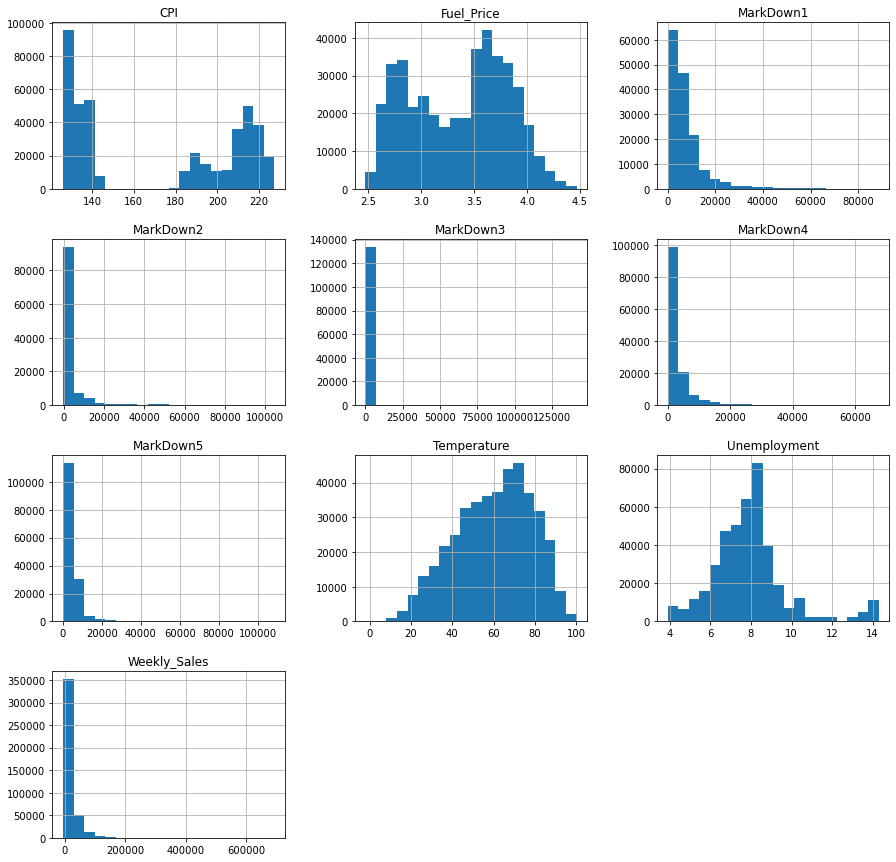

In [27]:
num_features = df.select_dtypes(include=['int', 'float'])
num_features.hist(bins=20, figsize=(15,15))

             IsHoliday_x  IsHoliday_y
IsHoliday_x          1.0          1.0
IsHoliday_y          1.0          1.0


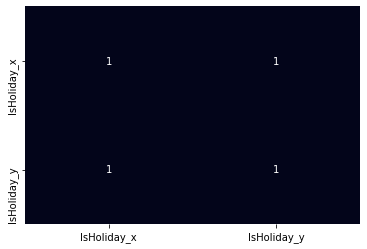

In [28]:
print(df[['IsHoliday_x', 'IsHoliday_y']].corr())
sns.heatmap(df[['IsHoliday_x', 'IsHoliday_y']].corr(), annot=True, cbar=False)

In [29]:
df.drop('IsHoliday_y', 1, inplace=True)
df.rename(columns={'IsHoliday_x' : 'IsHoliday'}, inplace=True)
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [30]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [31]:
round(df.isnull().mean()*100, 3)

Store            0.000
Dept             0.000
Date             0.000
Weekly_Sales     0.000
IsHoliday        0.000
Temperature      0.000
Fuel_Price       0.000
MarkDown1       64.257
MarkDown2       73.611
MarkDown3       67.481
MarkDown4       67.985
MarkDown5       64.079
CPI              0.000
Unemployment     0.000
Type             0.000
Size             0.000
dtype: float64

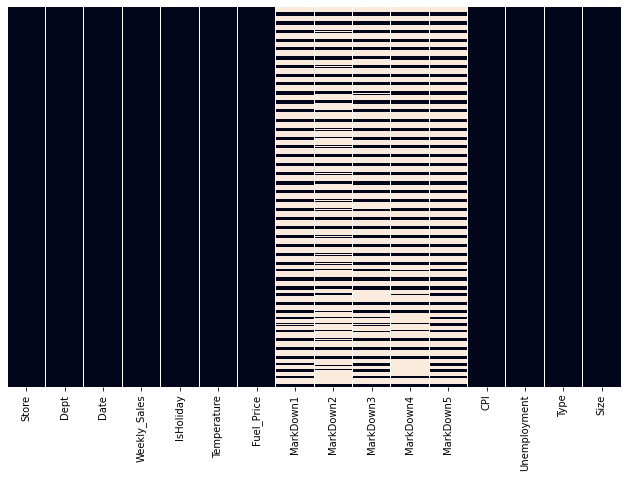

In [32]:
plt.figure(figsize=(11,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

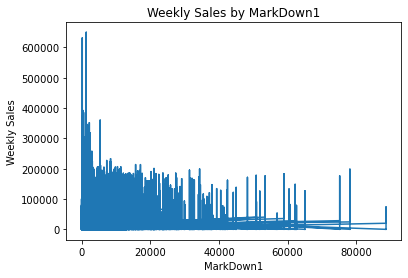

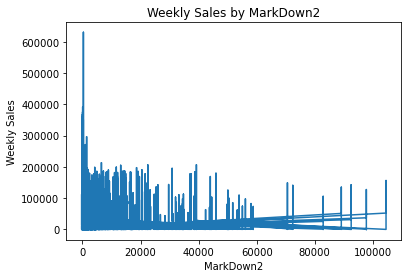

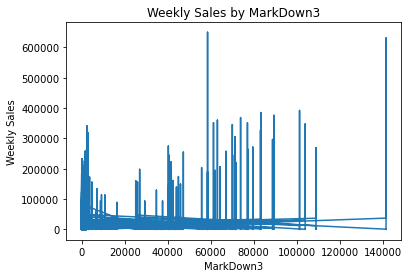

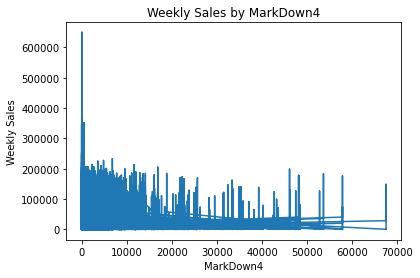

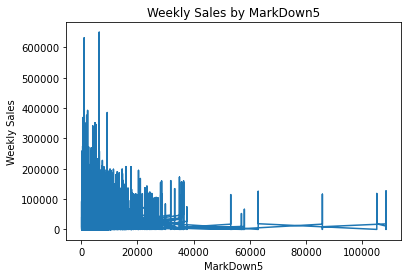

In [33]:
for features in df.isnull().sum()[df.isnull().sum()>1].index:
    plt.plot(df[features], df['Weekly_Sales'])
    plt.title('Weekly Sales by {}'.format(features))
    plt.xlabel(features)
    plt.ylabel('Weekly Sales')
    plt.show()

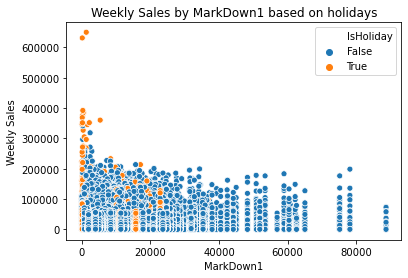

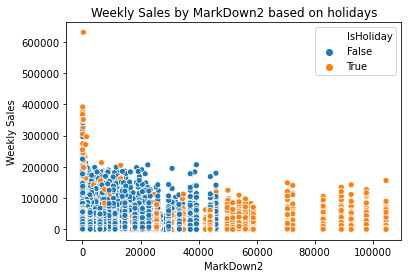

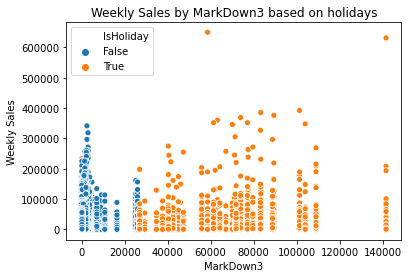

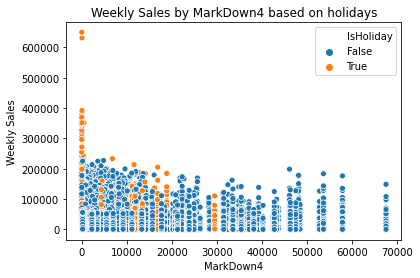

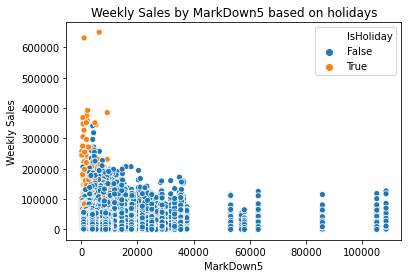

In [34]:
for features in df.isnull().sum()[df.isnull().sum()>1].index:   
    sns.scatterplot(x=features, y='Weekly_Sales', data=df, hue='IsHoliday')
    plt.title('Weekly Sales by {} based on holidays'.format(features))
    plt.xlabel(features)
    plt.ylabel('Weekly Sales')
    plt.show()

In [35]:
df.fillna(0, inplace=True)

In [36]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [37]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


Text(0.5, 1.0, 'Count of Stores')

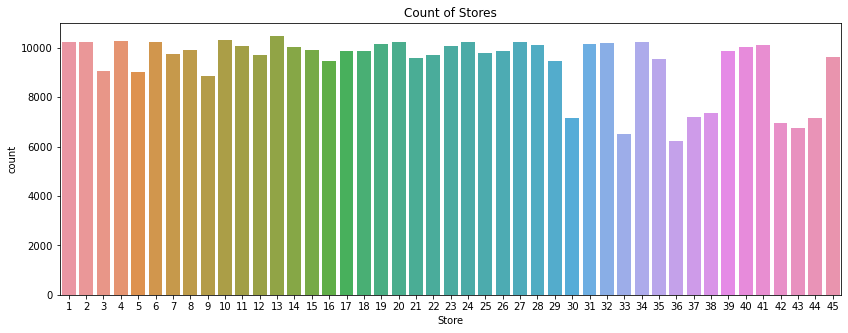

In [38]:
plt.figure(figsize=(14,5))
sns.countplot(df['Store'])
plt.title('Count of Stores')

Text(0, 0.5, 'Weekly Sales')

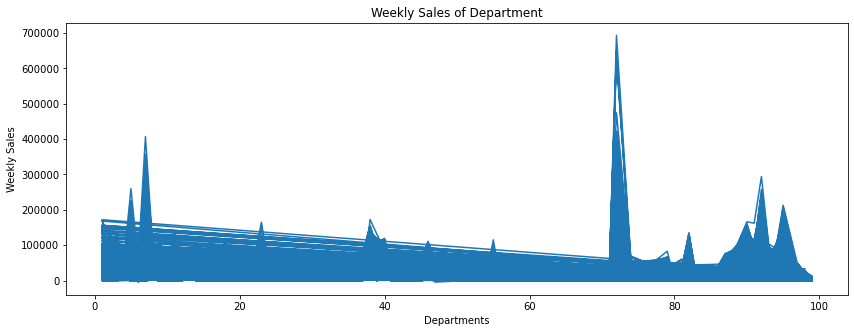

In [39]:
plt.figure(figsize=(14,5))
plt.plot(df['Dept'], df['Weekly_Sales'])
plt.title('Weekly Sales of Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')

Text(0, 0.5, 'Weekly Sales')

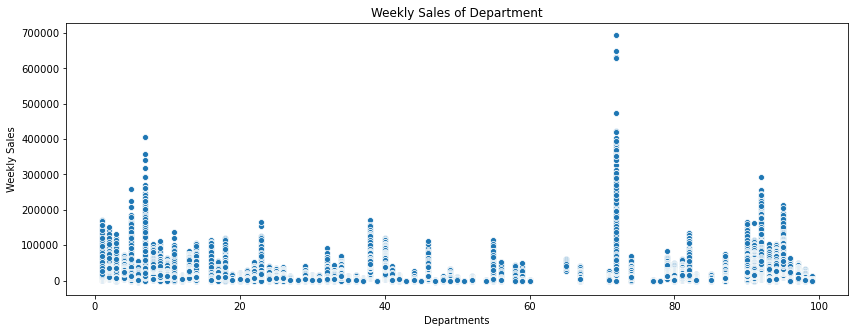

In [40]:
plt.figure(figsize=(14,5))
sns.scatterplot('Dept', 'Weekly_Sales', data=df)
plt.title('Weekly Sales of Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')

Text(0, 0.5, 'Weekly Sales')

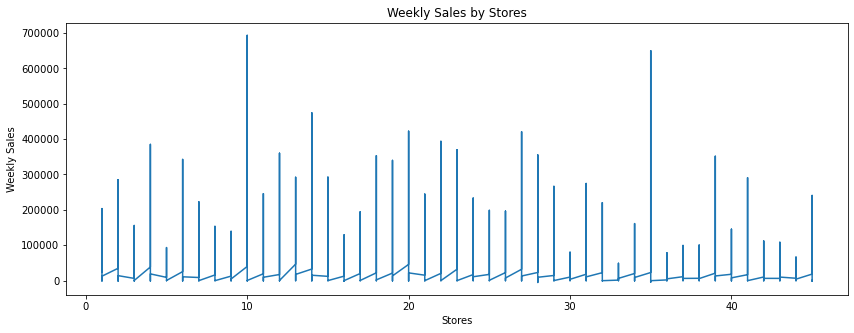

In [41]:
plt.figure(figsize=(14,5))
plt.plot(df['Store'], df['Weekly_Sales'])
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

Text(0, 0.5, 'Weekly Sales')

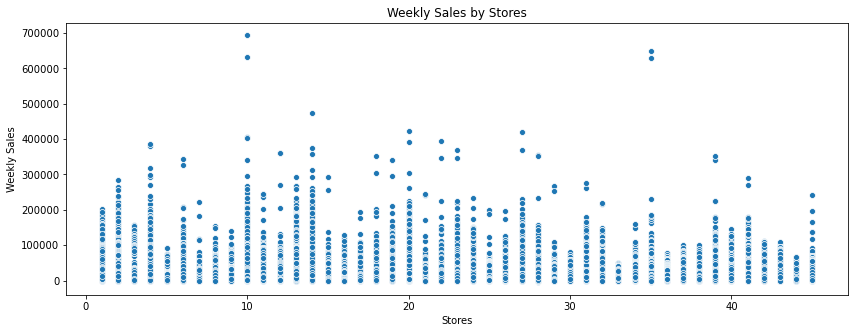

In [42]:
plt.figure(figsize=(14,5))
sns.scatterplot('Store', 'Weekly_Sales', data=df)
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.5,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5


In [44]:
for feature in ['Year', 'Month', 'Week']:
    print('{}\n Unique features = {}\n No. of unique features = {}\n'.format(feature, df[feature].unique(),
                                                                           df[feature].nunique()))

Year
 Unique features = [2010 2011 2012]
 No. of unique features = 3

Month
 Unique features = [ 2  3  4  5  6  7  8  9 10 11 12  1]
 No. of unique features = 12

Week
 Unique features = [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
  1  2  3  4]
 No. of unique features = 52



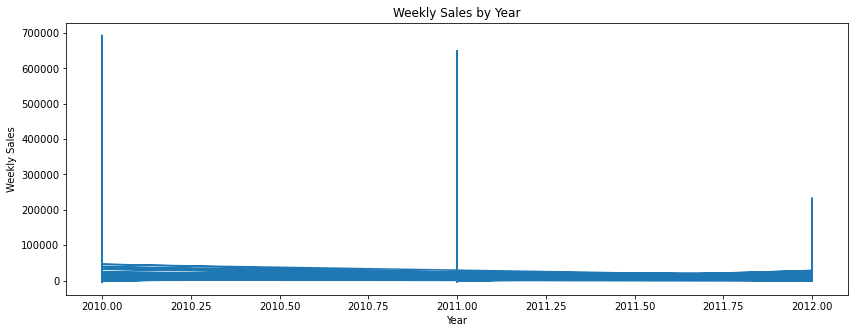

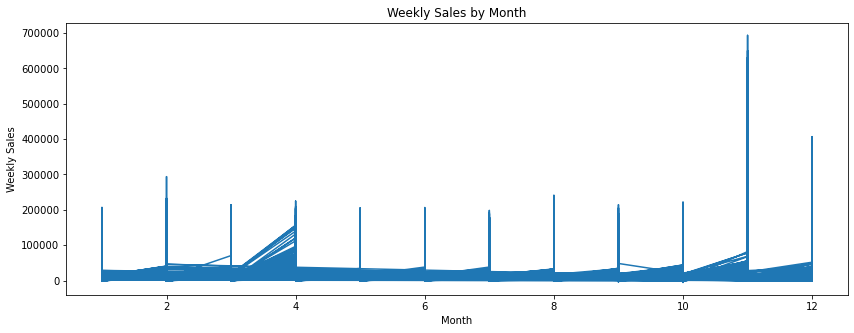

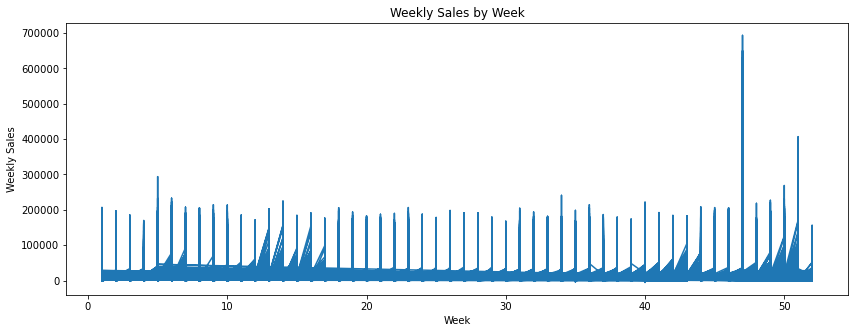

In [45]:
for feature in ['Year', 'Month', 'Week']:
    plt.figure(figsize=(14,5))
    plt.plot(df[feature], df['Weekly_Sales'])
    plt.title('Weekly Sales by {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')

In [46]:
stores.groupby('Type').describe()

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                                                                           \
               mean           std      min        25%       50%       75%   
Type                                                                        
A     177247.727273  49392.621098  39690.0  155840.75  202406.0  203819.0   
B     101190.705882  32371.137916  34875.0   93188.00  114533.0  123737.0   
C      40541.666667   1304.145033  39690.0   39745.00   39910.0   40774.0   

                
           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

Text(0.5, 1.0, 'Weekly Sales by Store Type')

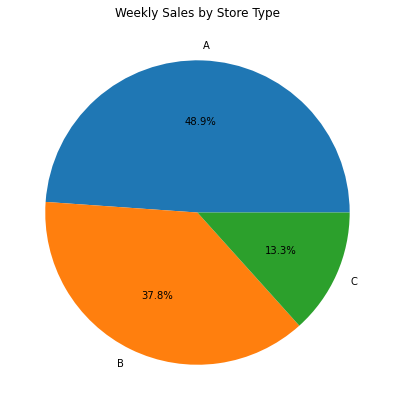

In [47]:
size = round(stores.groupby('Type').describe()['Size'], 2)
size = [(22/(22+17+6))*100, (17/(22+17+6))*100, (6/(22+17+6))*100]
plt.figure(figsize=(7,7))
plt.pie(size, labels=stores['Type'].unique().tolist(), autopct='%1.1f%%')
plt.title('Weekly Sales by Store Type')

In [48]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


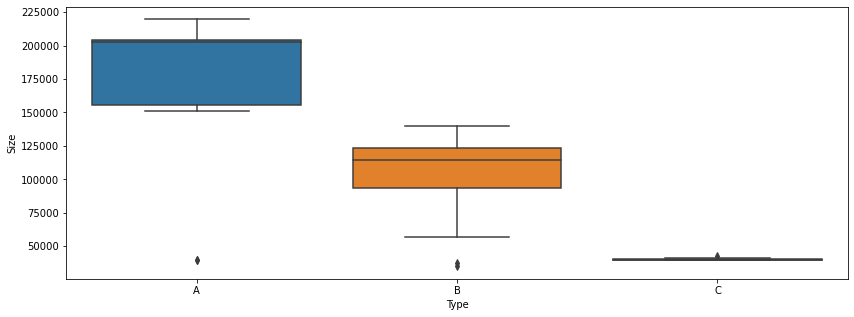

In [49]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Type', y='Size', data=stores)

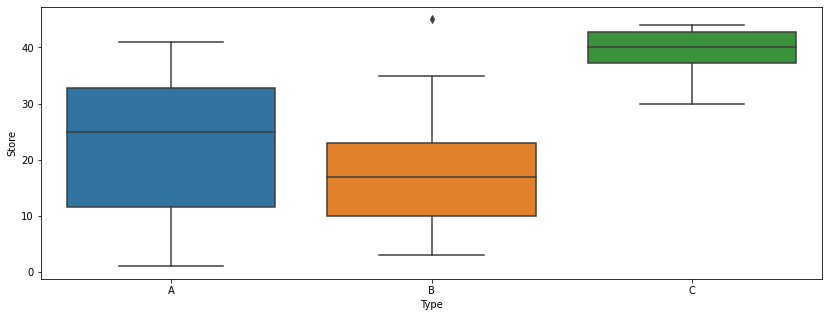

In [50]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Type', y='Store', data=stores)

In [51]:
train_stores_df = train.merge(stores, on='Store', how='inner')
train_stores_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [52]:
train_stores_df['Date'] = pd.to_datetime(train_stores_df['Date'])

train_stores_df['Year'] = train_stores_df['Date'].dt.year
train_stores_df['Month'] = train_stores_df['Date'].dt.month
train_stores_df['Week'] = train_stores_df['Date'].dt.week
train_stores_df['Day'] = train_stores_df['Date'].dt.day
train_stores_df['No. of days'] = (train_stores_df['Date'].dt.date-train_stores_df['Date'].dt.date.min()).apply(lambda x : x.days)

train_stores_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Week,Day,No. of days
0,1,1,2010-02-05,24924.50,False,A,151315,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,True,A,151315,2010,2,6,12,7
2,1,1,2010-02-19,41595.55,False,A,151315,2010,2,7,19,14
3,1,1,2010-02-26,19403.54,False,A,151315,2010,2,8,26,21
4,1,1,2010-03-05,21827.90,False,A,151315,2010,3,9,5,28


In [53]:
# removing negative values
train_stores_df = train_stores_df[train_stores_df['Weekly_Sales']>0]

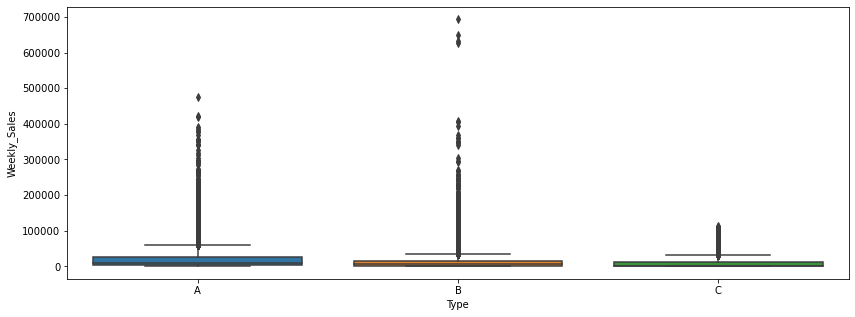

In [54]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=train_stores_df)

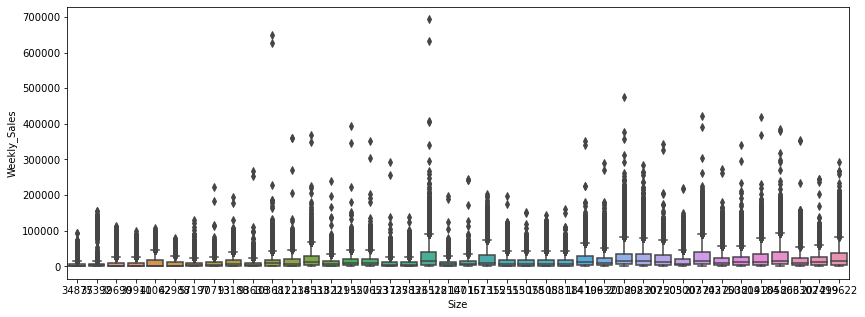

In [55]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Size', y='Weekly_Sales', data=train_stores_df)

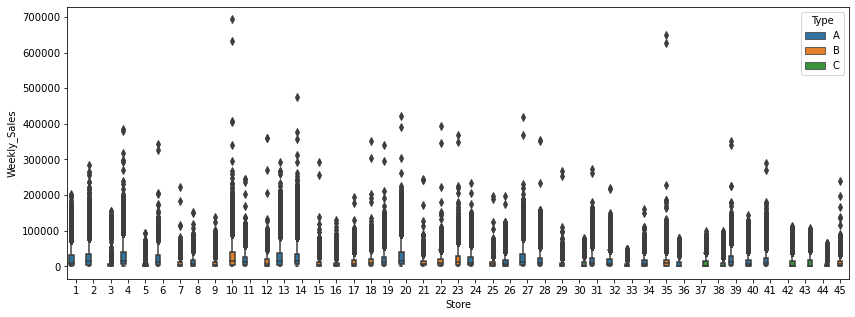

In [56]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Type', data=train_stores_df)

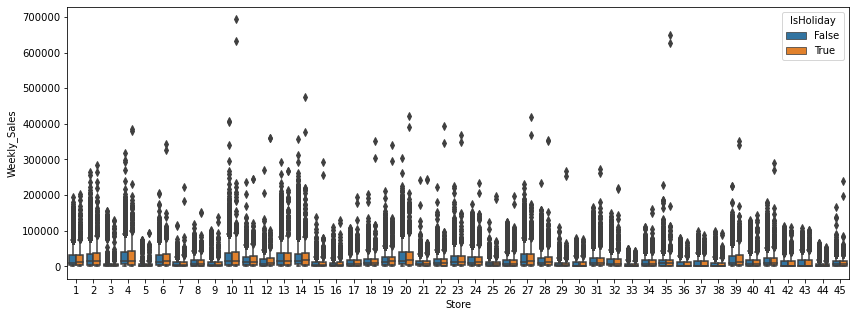

In [57]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Store', y='Weekly_Sales', hue='IsHoliday', data=train_stores_df)

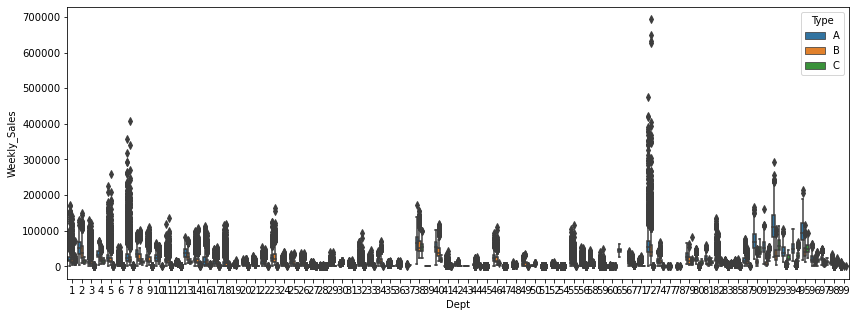

In [58]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Dept', y='Weekly_Sales', hue='Type', data=train_stores_df)

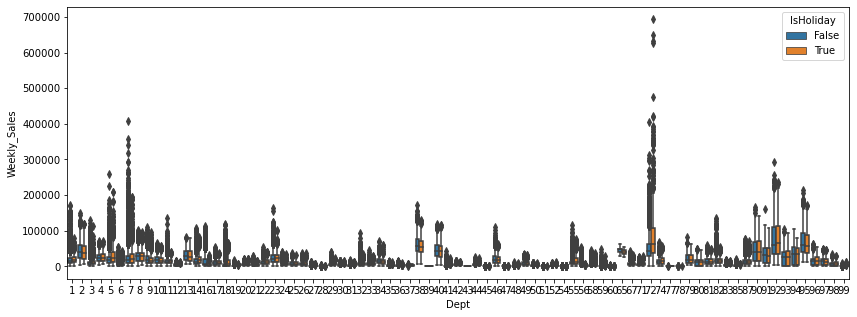

In [59]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Dept', y='Weekly_Sales', hue='IsHoliday', data=train_stores_df)

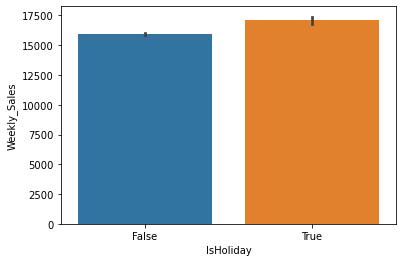

In [60]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_stores_df)

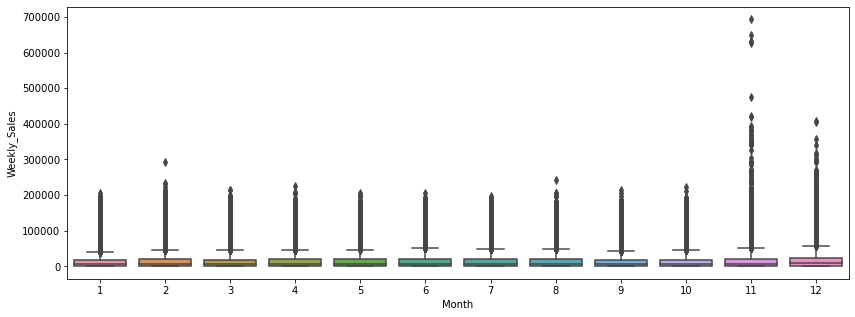

In [61]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Month', y='Weekly_Sales', data=train_stores_df)

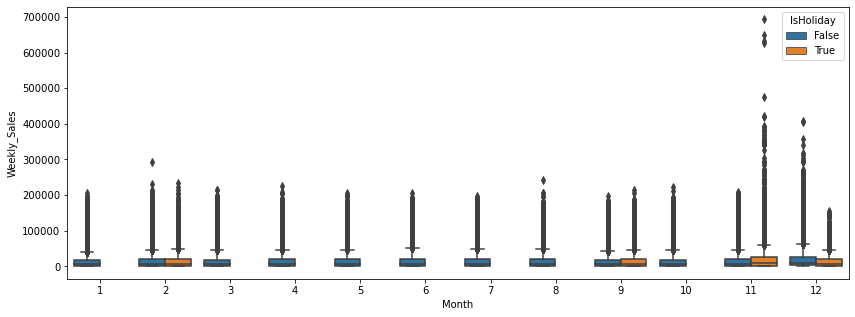

In [62]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Month', y='Weekly_Sales', hue='IsHoliday', data=train_stores_df)

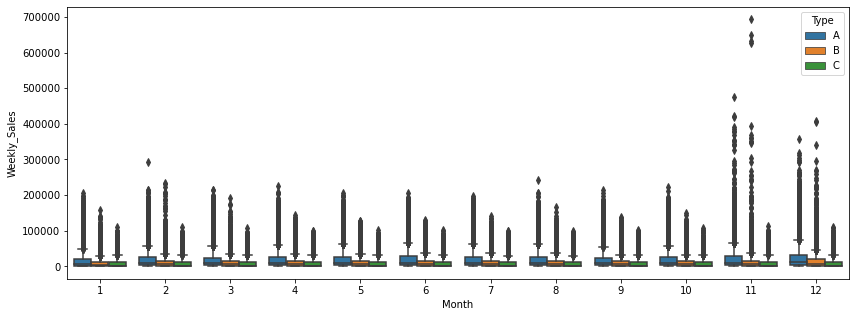

In [63]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Month', y='Weekly_Sales', hue='Type', data=train_stores_df)

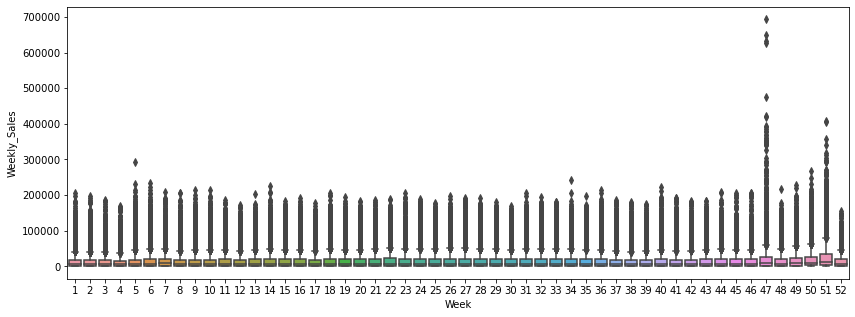

In [64]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Week', y='Weekly_Sales', data=train_stores_df)

((array([-4.65126611, -4.46497378, -4.36405486, ...,  4.36405486,
          4.46497378,  4.65126611]),
  array([1.0000000e-02, 1.0000000e-02, 1.0000000e-02, ..., 6.3099919e+05,
         6.4977018e+05, 6.9309936e+05])),
 (18698.08909274709, 16033.114591372925, 0.822626989885385))

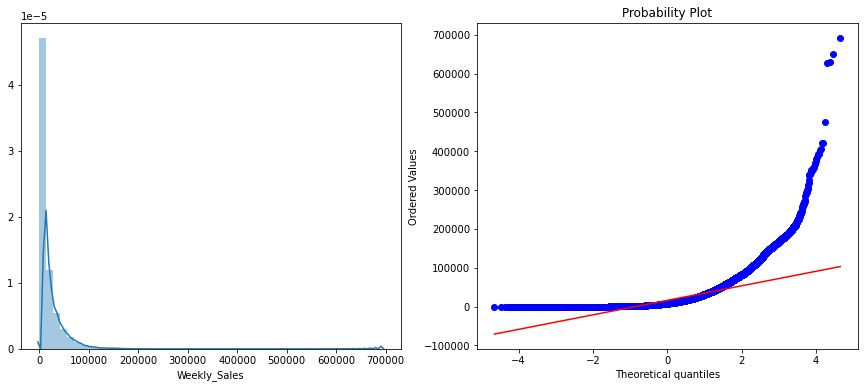

In [65]:
import scipy.stats as stat
import pylab

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(train_stores_df['Weekly_Sales'])
plt.subplot(1,2,2)
stat.probplot(train_stores_df['Weekly_Sales'], dist='norm', plot=pylab)

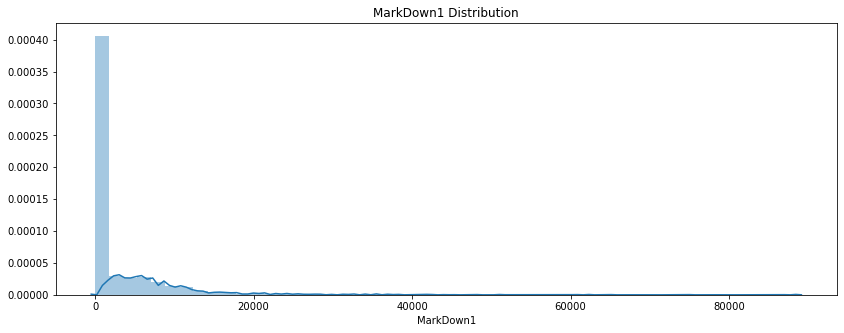

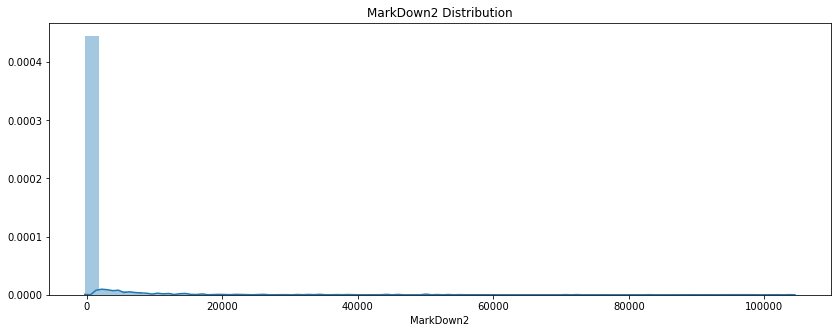

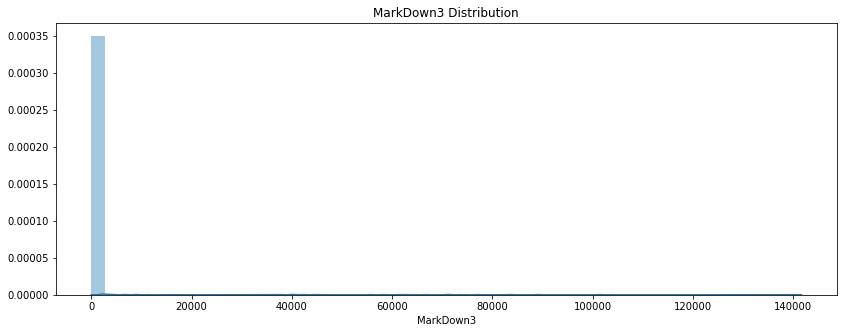

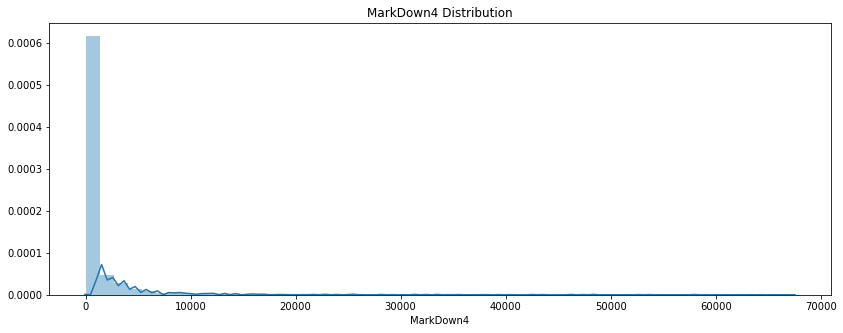

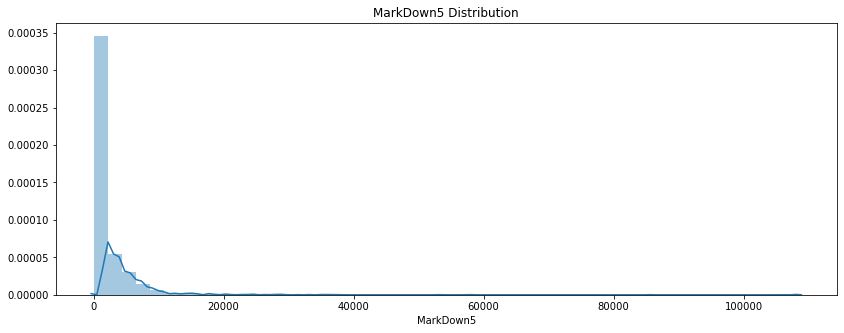

In [66]:
for feature in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    plt.figure(figsize=(14,5))
    sns.distplot(df[feature], kde=True)
    plt.title('{} Distribution'.format(feature))

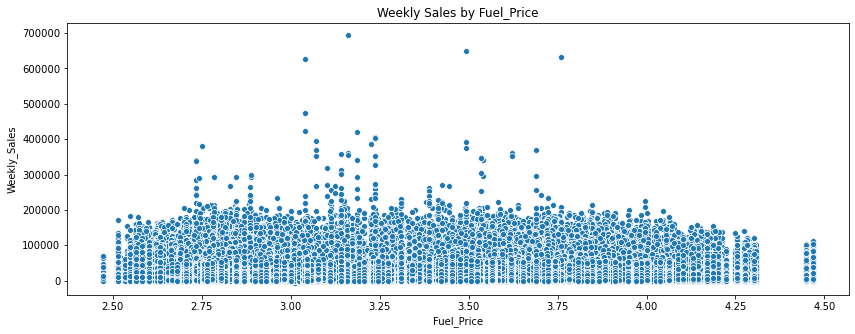

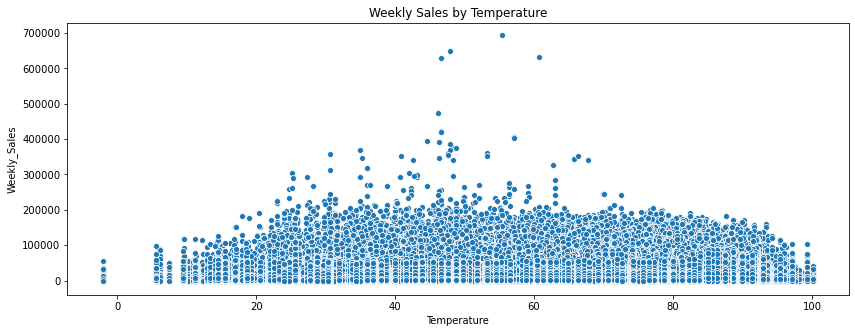

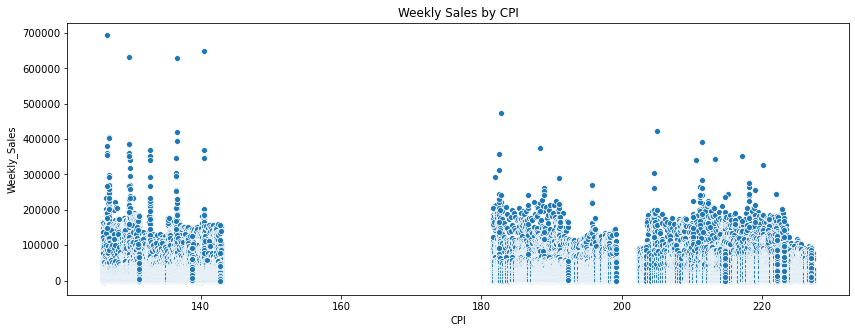

In [67]:
def scatterplots(df, feature):
    plt.figure(figsize=(14,5))
    sns.scatterplot(df[feature], df['Weekly_Sales'])
    plt.title('Weekly Sales by ' + feature)
    
scatterplots(df, 'Fuel_Price')
scatterplots(df, 'Temperature')
scatterplots(df, 'CPI')

In [68]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5


In [69]:
df['IsHoliday'] = np.where(df['IsHoliday']==True,1,0)

In [70]:
df.drop('Date', 1, inplace=True)

In [71]:
df.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5


In [72]:
num_cols = df.select_dtypes(exclude='object').drop('Weekly_Sales', 1).columns.tolist()
char_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Features = {}".format(num_cols))
print()
print("Categorical Features = {}".format(char_cols))

Numerical Features = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week']

Categorical Features = ['Type']


In [73]:
X_char_dum = pd.get_dummies(df[char_cols], drop_first = True)
X_all = pd.concat([df[num_cols], X_char_dum], axis=1, join='inner')

In [74]:
X = X_all
y = df['Weekly_Sales']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Shape of X_train = {} and X_test = {}'.format(X_train.shape, X_test.shape))

Shape of X_train = (316177, 18) and X_test = (105393, 18)


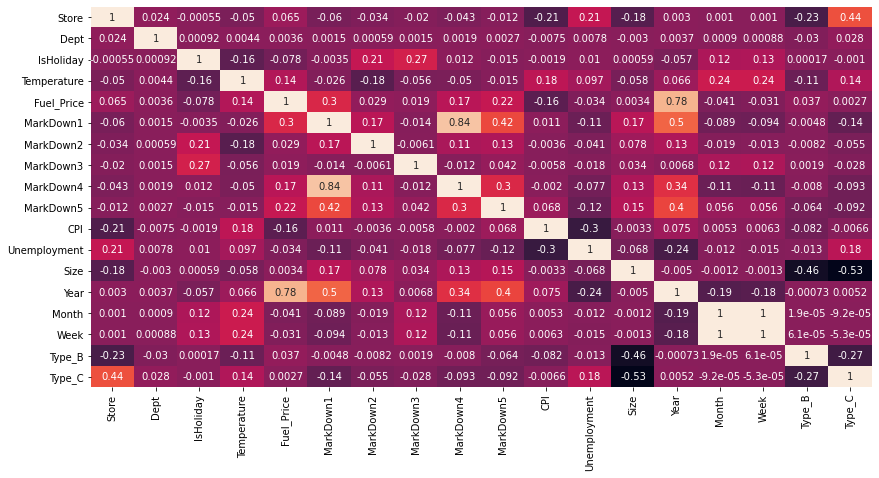

In [76]:
plt.figure(figsize=(14,7))
sns.heatmap(X.corr(), annot=True, cbar=False)

In [77]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print('Highly correlated features (Number of features = {}) = {}'.format(len(set(corr_features)), corr_features))

Highly correlated features (Number of features = 1) = {'Week'}


In [78]:
X_train.drop('Week', 1, inplace=True)
X_test.drop('Week', 1, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Train Score = {}'.format(lr.score(X_train, y_train)))
print('Test Score = {}'.format(lr.score(X_train, y_train)))
print('R2 Score = {}'.format(r2_score(y_test, y_pred_lr)))
print('Adjusted R2 Score = {}'.format(1-(1-r2_score(y_test, y_pred_lr))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Train Score = 0.090663510268441
Test Score = 0.090663510268441
R2 Score = 0.09034182675886682
Adjusted R2 Score = 0.09019507288987416


In [81]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Train Score = {}'.format(dt.score(X_train, y_train)))
print('Test Score = {}'.format(dt.score(X_train, y_train)))
print('R2 Score = {}'.format(r2_score(y_test, y_pred_dt)))
print('Adjusted R2 Score = {}'.format(1-(1-r2_score(y_test, y_pred_dt))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Train Score = 1.0
Test Score = 1.0
R2 Score = 0.9449638724763142
Adjusted R2 Score = 0.9449549935755512


In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Train Score = {}'.format(rf.score(X_train, y_train)))
print('Test Score = {}'.format(rf.score(X_train, y_train)))
print('R2 Score = {}'.format(r2_score(y_test, y_pred_rf)))
print('Adjusted R2 Score = {}'.format(1-(1-r2_score(y_test, y_pred_rf))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Train Score = 0.9953753418746702
Test Score = 0.9953753418746702
R2 Score = 0.966454754946309
Adjusted R2 Score = 0.9664493431392778


In [90]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Train Score = {}'.format(xgb.score(X_train, y_train)))
print('Test Score = {}'.format(xgb.score(X_train, y_train)))
print('R2 Score = {}'.format(r2_score(y_test, y_pred_xgb)))
print('Adjusted R2 Score = {}'.format(1-(1-r2_score(y_test, y_pred_xgb))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Train Score = 0.9396078393837892
Test Score = 0.9396078393837892
R2 Score = 0.9318116743337708
Adjusted R2 Score = 0.9318006736074473


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('R2 Score = {}'.format(r2_score(y_test, y_pred_rf)))
print()
print('Adjusted R2 Score = {}'.format(1-(1-r2_score(y_test, y_pred_rf))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))
print()
print('Mean Square Error = {}'.format(mean_squared_error(y_test, y_pred_rf)))
print()
print('Root Mean Square Error = {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print()
print('Mean Absolute Error = {}'.format(mean_absolute_error(y_test, y_pred_rf)))

R2 Score = 0.966454754946309

Adjusted R2 Score = 0.9664493431392778

Mean Square Error = 17519079.469897393

Root Mean Square Error = 4185.579944272645

Mean Absolute Error = 1597.9919470942095
